In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chess/games.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['axes.grid'] = False

In [3]:
df = pd.read_csv('/kaggle/input/chess/games.csv')

In [4]:
df.head(3)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3


In [5]:
df.describe()

,created_at,last_move_at,turns,white_rating,black_rating,opening_ply
count,2.005800e+04,2.005800e+04,20058.000000,20058.000000,20058.000000,20058.000000
mean,1.483617e+12,1.483618e+12,60.465999,1596.631868,1588.831987,4.816981
std,2.850151e+10,2.850140e+10,33.570585,291.253376,291.036126,2.797152
min,1.376772e+12,1.376772e+12,1.000000,784.000000,789.000000,1.000000
25%,1.477548e+12,1.477548e+12,37.000000,1398.000000,1391.000000,3.000000
50%,1.496010e+12,1.496010e+12,55.000000,1567.000000,1562.000000,4.000000
75%,1.503170e+12,1.503170e+12,79.000000,1793.000000,1784.000000,6.000000
max,1.504493e+12,1.504494e+12,349.000000,2700.000000,2723.000000,28.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


### We Dont have any Null Values

<AxesSubplot:xlabel='turns', ylabel='Count'>

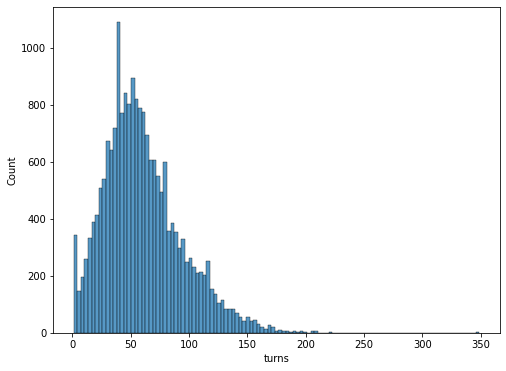

In [7]:
sns.histplot(x='turns',data=df)

### *From the above histogram we can say that turns in the game is normally distributed, but left skewed and rom the above plot we can also say that the mean of the turns lies between 60 to 62*

In [8]:
print("Mean :: ",df['turns'].mean())
print("Median :: ",df['turns'].median())

Mean ::  60.46599860404826
Median ::  55.0


<AxesSubplot:xlabel='victory_status', ylabel='count'>

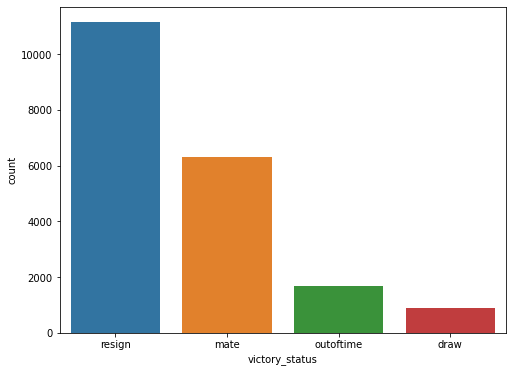

In [9]:
sns.countplot(x='victory_status',data=df,order=df['victory_status'].value_counts().index)

### *Here we can observe that the sum of 'resign' is much more greater than other categories, May be the reason is to start a game with the active player instead of waiting for another player*

<AxesSubplot:xlabel='winner', ylabel='count'>

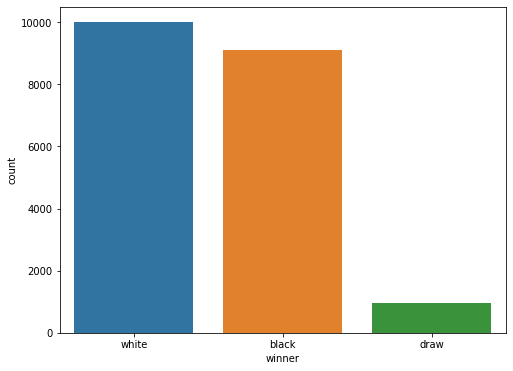

In [10]:
sns.countplot(x='winner',data=df,order=df['winner'].value_counts().index)

### *Here 'White' is the winner, As we all know there is advantage in chess the white player moves the first chance, So may be there is some relation between the first move and the winner.*

## Increment code

### *This variable controls the timer that the game is played under. In timed chess games (most online chess games are timed, for obvious reasons) each player is afforded a time basis (10 minutes, 15 minutes, etc.) awarded at the beginning of the game and an increment (15 seconds etc.) awarded every time a turn starts. If the player runs the clock out, they lose the game.*

### *This field is populated by strings in the form 15+2. The first number, 15, is the time basis in minutes; the second number, 2, is the increment in seconds.*

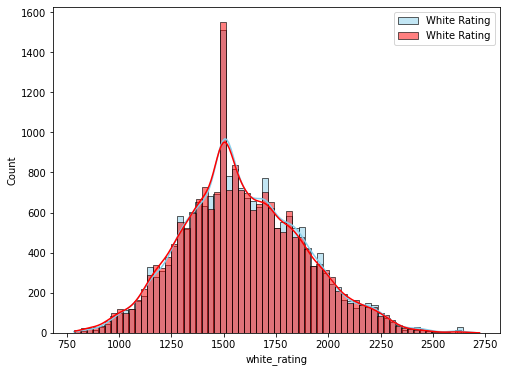

In [11]:
sns.histplot(df['white_rating'], label='White Rating', color='skyblue', kde=True)
sns.histplot(df['black_rating'], label='White Rating', color='red', kde=True)
plt.legend()
plt.show()

### *White Rating and Black Rating both are normally distributed*

In [12]:
print("White Rating Mean",df['white_rating'].mean())
print("White Rating Median",df['white_rating'].median())

print("Balck Rating Mean",df['black_rating'].mean())
print("Black Rating Median",df['black_rating'].mean())

White Rating Mean 1596.6318675840064
White Rating Median 1567.0
Balck Rating Mean 1588.8319872370128
Black Rating Median 1588.8319872370128


### Opening

#### *A chess opening or simply an opening refers to the initial moves of a chess game. The term can refer to the initial moves by either side, White or Black, but an opening by Black may also be known as a defense. There are dozens of different openings, and hundreds of variants. The Oxford Companion to Chess lists 1,327 named openings and variants. These vary widely in character from quiet positional play to wild tactical play. In addition to referring to specific move sequences, the opening is the first phase of a chess game, the other phases being the middlegame and the endgame.*

In [13]:
df['opening_name'].value_counts()

Van't Kruijs Opening                                            368
Sicilian Defense                                                358
Sicilian Defense: Bowdler Attack                                296
French Defense: Knight Variation                                271
Scotch Game                                                     271
                                                               ... 
Sicilian Defense: Najdorf Variation |  Polugaevsky Variation      1
King's Gambit |  Falkbeer Countergambit |  Modern Transfer        1
Tarrasch Defense: Classical Variation |  Carlsbad Variation       1
Caro-Kann Defense: Classical Variation |  Lobron System           1
Zukertort Opening: Wade Defense                                   1
Name: opening_name, Length: 1477, dtype: int64

### Hence some example values are:

****Van't Kruijs Opening****

****Sicilian Defense: Bowdler Attack****

****Queen's Gambit Accepted: Normal Variation |  Traditional System****

****Pirc Defense: Classical Variation |  Quiet System |  Chigorin Line****

In [14]:
df['opening_name'].head(20)

0                      Slav Defense: Exchange Variation
1                Nimzowitsch Defense: Kennedy Variation
2                 King's Pawn Game: Leonardis Variation
3                Queen's Pawn Game: Zukertort Variation
4                                      Philidor Defense
5                  Sicilian Defense: Mongoose Variation
6            Blackmar-Diemer Gambit: Pietrowsky Defense
7     Nimzowitsch Defense: Kennedy Variation |  Link...
8                 Italian Game: Schilling-Kostic Gambit
9         Scandinavian Defense: Mieses-Kotroc Variation
10                                 Van't Kruijs Opening
11    French Defense: Advance Variation |  Paulsen A...
12                     French Defense: Knight Variation
13                                    French Defense #2
14                 Four Knights Game: Italian Variation
15    Italian Game: Two Knights Defense |  Knight At...
16                 Four Knights Game: Italian Variation
17                 Four Knights Game: Italian Va

### *Here we can see we have some prety cominations of Opening moves, Lets see How many of them we have in total*

In [15]:
df['opening_name'].map(lambda x : x.split("|")[0].split(":")[0]).value_counts().head(10)

Sicilian Defense        2573
French Defense          1306
Queen's Pawn Game       1059
Italian Game             981
King's Pawn Game         917
Ruy Lopez                858
English Opening          720
Scandinavian Defense     716
Caro-Kann Defense        593
Scotch Game              465
Name: opening_name, dtype: int64

### *Here We can see the top 3 Opening moves are*

#### *Sicilian Defense*        
#### *French Defense*          
#### *Queen's Pawn Game*

In [16]:
df[df['opening_name']=='Sicilian Defense']['opening_ply'].value_counts()

4    171
2    151
3     20
5     16
Name: opening_ply, dtype: int64

#### *opening_ply is an interesting field because it states to how many moves the studied opening line holds. For example, note that in the follow 5-ply Sicilian Defense games, the opening sequence is always e4 c5 Nf3 d6 d4.*

In [17]:
df[((df['opening_name'] == 'Sicilian Defense') & (df['opening_ply'] == 5))].head(3)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
270,PEIWrbTQ,True,1.471100e+12,1.471100e+12,29,mate,white,7+3,eideral,1513,atorius,1456,e4 c5 Nf3 d6 d4 Nc6 Bb5 a6 Bxc6+ bxc6 dxc5 Qa5...,B54,Sicilian Defense,5
4546,nxDsrrWl,True,1.479670e+12,1.479670e+12,37,resign,white,0+15,drawmeister2015,2013,jopeshdamaster,1773,e4 c5 Nf3 d6 d4 Nc6 dxc5 dxc5 Qxd8+ Nxd8 Bb5+ ...,B54,Sicilian Defense,5
5278,btRX748K,True,1.463630e+12,1.463630e+12,67,outoftime,white,10+0,reneesh,1709,evan_h1234,1334,e4 c5 Nf3 d6 d4 Nc6 Bb5 Bd7 d5 Nb4 Bxd7+ Qxd7 ...,B54,Sicilian Defense,5


#### *ply is a term from game theory. A single ply is an identifiable unit of play which shifts the game's decision tree. In chess, this is every single move, that is, every time a piece is moved and the turn is passed to another player.*

#### *Algebraic notation is a format for describing a sequence of chess moves. In algebraic notation the board is divided into a grid, of ascending letters and numbers. Every piece besides the pawn gets a letter. So for example e4 c5 Nf3 means "white pawn to e4, then black pawn to c5, then white knight to f3. And so on.*